# Mines-Ponts 2021 - Partie II : Mouvement brownien d'une petite particule

De petites particules en suspension dans un liquide se déplacent spontanément sous l’effet de l’agitation thermique du milieu environnant, donnant ainsi naissance à des trajectoires apparemment chaotiques et peu régulières. Ce phénomène est à la base de la vie : l’agitation incessante des protéines permet aux réactions biochimiques de se produire à l’intérieur de nos cellules. Il a été observé expérimentalement en 1827 sur des grains de pollen en suspension dans l’eau par le botaniste Robert Brown, d’où le nom de mouvement brownien. Son étude théorique par Albert Einstein en 1905 a permis au physicien Jean Perrin d’estimer la valeur du nombre d’Avogadro dans une série d’expériences menées entre 1907 et 1909.

Dans cette partie, on s’intéresse à un modèle du mouvement brownien proposé par Paul Langevin en 1908. Dans ce modèle, la particule étudiée est supposée soumise à deux actions de la part du fluide :
- une force de frottement fluide $\vec{f}_{F} = - \alpha \vec{v}$ ;
- une force $\vec{f}_{B}$ aléatoire simulant l’action désordonnée des molécules d’eau sur la particule. 

Le mouvement de cette particule est donc régi par l’équation différentielle : $\dfrac{\mathrm{d}\vec{v}}{\mathrm{d} t} = - \dfrac{\alpha \vec{v}}{m} + \dfrac{\vec{f}_{B}}{m}$.

Pour faire une simulation en deux dimensions, on prend une particule de masse m = $10^{−6}$ kg, on attribue à $\alpha$ la valeur $10^{−5}$ kg/s, on suppose enfin que $\vec{f}_{B}$ change à chaque pas d’intégration, avec une direction isotrope aléatoire (l’angle suit une loi de probabilité uniforme) et une norme qui est la valeur absolue d’une variable aléatoire suivant une loi de probabilité gaussienne (loi normale) d’espérance $\mu$ nulle et d’écart-type $\sigma$ = $10^{−8}$ N.

On simule le vecteur d’état $E = (x, y, \dot{x}, \dot{y})$ de la particule en intégrant $\dot{E} = (\dot{x},\dot{y},\ddot{x},\ddot{y})$ selon la méthode d’Euler. $E$ et $\dot{E}$ seront chacun représentés par une liste de 4 flottants.

L’instruction \textbf{assert expression} de Python vérifie la véracité d’une expression booléenne et interrompt brutalement l’exécution du programme si ce n’est pas le cas. Elle permet de vérifier très simplement une précondition ou un invariant, comme illustré dans la trame du programme ci-dessous.

Le module **random** fournit la fonction **uniform(bi, bs)** qui renvoie un flottant aléatoire entre les valeurs bi et bs incluses en utilisant une densité de probabilité uniforme ainsi que la fonction **gauss(mu, sigma)** qui renvoie un flottant aléatoire en utilisant une densité de probabilité gaussienne d’espérance mu et d’écart-type sigma.
Le module math fournit enfin les fonctions cos et sin (en radians), la fonction sqrt et la constante pi. La fonction abs est directement disponible.

In [1]:
# import python à compléter
from math import sin, cos, pi  
from random import uniform,gauss

In [2]:
# paramètres physiques
MU=0
SIGMA=1E-8
M=1E-6
ALPHA=1E-5

# vérification des hypothèses sur les paramètres
assert MU>=0 and SIGMA>0 and M>0 and ALPHA>0

Q10 - Implémmenter la fonction **vma(v1, a, v2)** (multiplication-addition sur des vecteurs) avec v1 et v2 des listes de flottants et a un scalaire flottant, qui renvoie une nouvelle liste de flottants correspondant à : $\vec{v} = \vec{v}_{1} + a.\vec{v}_{2}$. La fonction verifiera que les deux listes en entrée sont de même longueur avec assert.

In [3]:
def vma(v1,a,v2) :
    """ v1 et v2 sont des listes de 4 flottants associés à des vecteurs, a est un flottant
    La fonction renvoie v1+a*v2"""
    assert len(v1)==len(v2)
    res=[]
    for i in range(len(v1)) :
        res.append(v1[i]+a*v2[i])
    return res

Q11 - Implémenter la fonction **derive(E)** qui renvoie la dérivée du vecteur d'état passé en paramètre d'après l'équation différentielle décrite en introduction de la partie.

In [4]:
def derive(E) :
    """ E est une liste de 4 flottant (un vecteur d'état)
    La fonction renvoi la dérivée de E en utilisant l'edo donnée dans l'énoncé"""
    # fb est défini par un angle et une norme
    angleF=uniform(-pi,pi)
    normeF=gauss(MU,SIGMA)
    fb=[normeF*cos(angleF),normeF*sin(angleF)]
    # il y a deux constantes multiplicatives on ne peut pas utiliser vma
    # la dérivée de E commence par x' et y' qui sont dans E puis x'' et y''
    # qui sont donnés par l'équation différentielle
    return [E[2],E[3],-ALPHA*E[2]/M+fb[0]/M,-ALPHA*E[3]/M+fb[1]/M]

Q12 - Implémenter la fonction **euler(E0, dt, n)** pour résoudre numériquement l’équation différentielle par la méthode d’Euler avec E0 le vecteur d’état initial, dt le pas d’intégration et n le nombre de pas de la simulation. La fonction renvoie la liste des n + 1 vecteurs d’état.

In [5]:
def euler(E0,dt,n) :
    """ E0 est une liste de 4 flottants (un vecteur d'état, dt est un flottant (le pas) et n un entier (le nombre de pas de la simulation
    La fonction renvoie une liste de vecteurs d'état obtenus en appliquant la méthode d'euler à l'edo proposée"""
    Es=[E0]
    # euler donne E_{k+1}=E_k + dt*derive(E_k)
    for k in range(n) :
        Es.append(vma(Es[k],dt,derive(Es[k])))
    return Es

À titre d’exemple, voici le tracé d’une trajectoire obtenue par cette méthode (exécuter la cellule suivant).

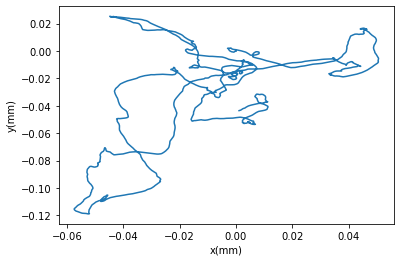

In [6]:
# simulation
DT=0.002   # durée du pas en secondes
N=5000     # nombre de pas

Es=euler([0.0,0.0,0.0,0.0],DT,N)

### zone de test

import matplotlib.pyplot as plt

Lx=[1000*elem[0] for elem in Es]
Ly=[1000*elem[1] for elem in Es]
plt.plot(Lx,Ly)
plt.xlabel("x(mm)")
plt.ylabel("y(mm)")
plt.show()

# le graphique obtenu n'est pas à la même échelle que celui de l'énoncé